In [ ]:
# https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [ ]:
############################################# 1. ################################################### 
# (Import Data / EDA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import chardet
with open("/content/drive/MyDrive/Xccelerate/ML Project/Online Payments Fraud Detection Dataset.csv",'rb') as rawdata:
  result=chardet.detect(rawdata.read(100000))
result

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Xccelerate/ML Project/Online Payments Fraud Detection Dataset.csv", encoding='ISO-8859-1')

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.drop(['nameOrig','nameDest'],axis='columns',inplace=True)

In [ ]:
df=df.iloc[:3000000,:] 

In [ ]:
df.shape

(3000000, 9)

In [ ]:
df.isFraud.value_counts()/len(df)*100

0    99.9127
1     0.0873
Name: isFraud, dtype: float64

In [ ]:
# The data is highly imbalanced.

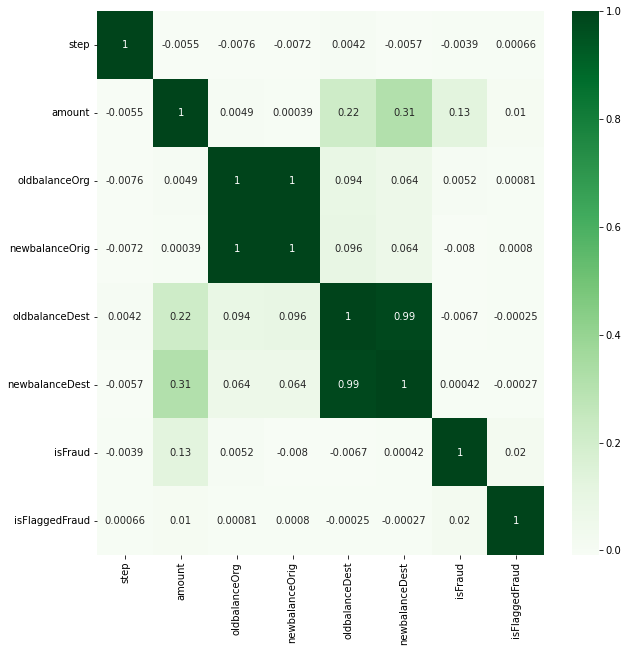

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Greens")

In [ ]:
#Get the Independent and Dependent Features
X=df.iloc[:,0:7]
Y=df.iloc[:,7]

In [ ]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
2999995    0
2999996    0
2999997    0
2999998    0
2999999    0
Name: isFraud, Length: 3000000, dtype: int64

In [ ]:
df.type.value_counts()

CASH_OUT    1067411
PAYMENT     1006561
CASH_IN      658719
TRANSFER     248493
DEBIT         18816
Name: type, dtype: int64

In [ ]:
# Dummy Encoding
type=pd.get_dummies(X['type'],drop_first=True)
#Dummy Trap

In [ ]:
type.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [ ]:
"""
"""

X=pd.concat([X,type],axis=1)
X=X.drop(['type'],axis='columns')
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0


In [ ]:
############################################# 2. ###################################################
# (Train Test Split / Feature Scaling)

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
len(X_train)

2400000

In [ ]:
len(X_test)

600000

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
############################################# 3.1 ###################################################
# (Knn)

In [ ]:
#Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Initiating the classifier
classifier_kn = KNeighborsClassifier()
#Passing the data to the classifier
classifier_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_pred_kn = classifier_kn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_kn = confusion_matrix(y_test, y_pred_kn)
print('Confusion Matrix')
print(result)

Confusion Matrix
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
result1_kn = classification_report(y_test, y_pred_kn)
print('Classification Report')
print(result1_kn)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    599499
           1       0.98      0.55      0.70       501

    accuracy                           1.00    600000
   macro avg       0.99      0.78      0.85    600000
weighted avg       1.00      1.00      1.00    600000



In [ ]:
result2_kn = accuracy_score(y_test, y_pred_kn)
print('Accuracy: ', result2_kn)

Accuracy:  0.9996133333333334


In [ ]:
############################################# 3.2 ###################################################
# (Decision Tree)

In [ ]:
#Call the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Initiating the classifier
classifier_dt = DecisionTreeClassifier()
#Passing the data to the classifier
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix')
print(result_dt)

Confusion Matrix
[[599406     93]
 [    98    403]]


In [ ]:
result1_dt = classification_report(y_test, y_pred_dt)
print('Classification Report')
print(result1_dt)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    599499
           1       0.81      0.80      0.81       501

    accuracy                           1.00    600000
   macro avg       0.91      0.90      0.90    600000
weighted avg       1.00      1.00      1.00    600000



In [ ]:
result2_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy: ', result2_dt)

Accuracy:  0.9996816666666667


In [ ]:
############################################# 3.3 ###################################################
# (Naive Bayes)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_nb = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix')
print(result_nb)

Confusion Matrix
[[239766 359733]
 [     0    501]]


In [ ]:
result1_nb = classification_report(y_test, y_pred_nb)
print('Classification Report')
print(result1_nb)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.40      0.57    599499
           1       0.00      1.00      0.00       501

    accuracy                           0.40    600000
   macro avg       0.50      0.70      0.29    600000
weighted avg       1.00      0.40      0.57    600000



In [ ]:
result2_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy: ', result2_nb)

Accuracy:  0.400445


In [ ]:
############################################# 3.4 ###################################################
# (SVM) ---> Time Outed

In [ ]:
############################################# 3.5 ###################################################
# (Random Forest / ROC AUC)

In [ ]:
# Fitting RFClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=10)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix')
print(result_rf)

Confusion Matrix
[[599493      6]
 [   125    376]]


In [ ]:
result1_rf = classification_report(y_test, y_pred_rf)
print('Classification Report')
print(result1_rf)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    599499
           1       0.98      0.75      0.85       501

    accuracy                           1.00    600000
   macro avg       0.99      0.88      0.93    600000
weighted avg       1.00      1.00      1.00    600000



In [ ]:
result2_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', result2_rf)

Accuracy:  0.9997816666666667


In [ ]:
############################################# 4.1 ################################################### 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

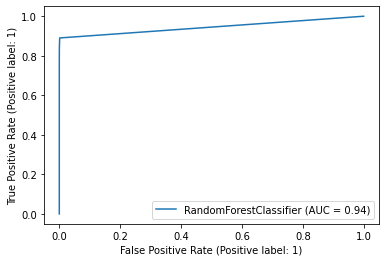

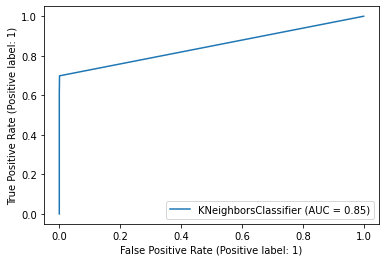

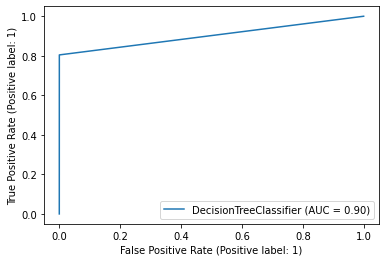

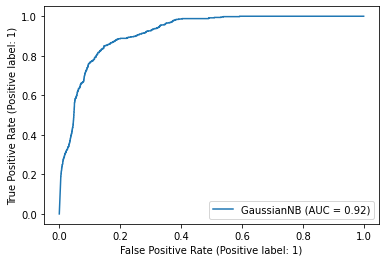

In [ ]:
from sklearn import metrics

# Random Forest
metrics.plot_roc_curve(classifier_rf, X_test, y_test)  
# K-nn
metrics.plot_roc_curve(classifier_kn, X_test, y_test) 
# Decision Tree
metrics.plot_roc_curve(classifier_dt, X_test, y_test)
# Naive Bayes
metrics.plot_roc_curve(classifier_nb, X_test, y_test) 
# SVM
# metrics.plot_roc_curve(classifier_svm, X_test, y_test)  

plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

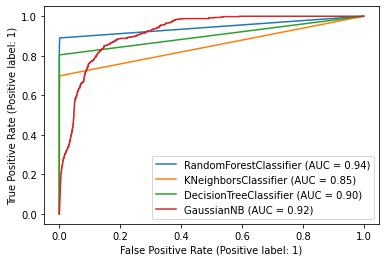

In [ ]:
classifiers_all = [classifier_rf,classifier_kn,classifier_dt,classifier_nb] #,classifier_svm]
ax = plt.gca()
for i in classifiers_all:
    metrics.plot_roc_curve(i, X_test, y_test, ax=ax)

In [ ]:
############################################# 4. ###################################################
# (Ensemble Learning / Feature Selection) --> Recommend drop 4 features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

feature_names = [f"feature {i}" for i in range(X.shape[1])]

rf_fi=RandomForestRegressor(n_estimators=10)
rf_fi.fit(X_train,y_train)
rf_fi.feature_importances_


array([5.26658484e-02, 2.07566979e-01, 3.26607278e-01, 4.80637622e-02,
       1.64754828e-01, 1.92355210e-01, 4.78369014e-03, 0.00000000e+00,
       1.40857494e-04, 3.06154649e-03])

<BarContainer object of 10 artists>

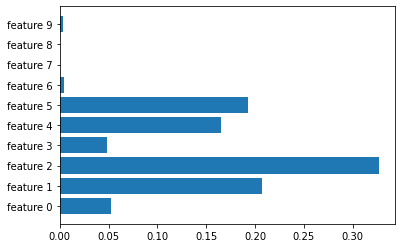

In [ ]:
plt.barh(feature_names,rf_fi.feature_importances_)

#sorted_idx = rf_fi.feature_importances_.argsort()
#plt.barh(df.feature_names[sorted_idx], rf_fi.feature_importances_[sorted_idx])
#plt.xlabel("Random Forest Feature Importance")

In [ ]:
"""
"""

"""
"""
#######################################################################################################